In [7]:
from highcharts import Highchart
import xarray as xr
import pandas as pd
import numpy as np


In [11]:
fileName = "http://thredds.aodn.org.au/thredds/dodsC/IMOS/ANMN/QLD/GBRCCH/gridded_timeseries/IMOS_ANMN-QLD_TZ_20070910_GBRCCH_FV02_TEMP-gridded-timeseries_END-20190901_C-20200523.nc"
nc = xr.open_dataset(fileName)
nc.data_vars

Data variables:
    TEMP_count  (TIME) int16 ...
    TEMP        (TIME, DEPTH) float32 ...

In [13]:
nc.TEMP

<xarray.DataArray 'TEMP' (TIME: 97452, DEPTH: 14)>
[1364328 values with dtype=float32]
Coordinates:
  * TIME       (TIME) datetime64[ns] 2007-09-10T07:00:00 ... 2019-09-01T01:00:00
  * DEPTH      (DEPTH) float32 0.0 10.0 20.0 30.0 ... 100.0 110.0 120.0 130.0
    LATITUDE   float64 ...
    LONGITUDE  float64 ...
Attributes:
    valid_min:      -2.5
    long_name:      sea_water_temperature
    cell_methods:   TIME:median DEPTH: point
    standard_name:  sea_water_temperature
    units:          degrees_Celsius
    valid_max:      40.0
    _ChunkSizes:    [48726     7]

In [15]:
temp20 = nc.TEMP[:,2]
temp20

<xarray.DataArray 'TEMP' (TIME: 97452)>
array([21.291964, 21.311615, 21.388363, ..., 21.67979 , 21.699995, 21.716757],
      dtype=float32)
Coordinates:
  * TIME       (TIME) datetime64[ns] 2007-09-10T07:00:00 ... 2019-09-01T01:00:00
    DEPTH      float32 20.0
    LATITUDE   float64 ...
    LONGITUDE  float64 ...
Attributes:
    valid_min:      -2.5
    long_name:      sea_water_temperature
    cell_methods:   TIME:median DEPTH: point
    standard_name:  sea_water_temperature
    units:          degrees_Celsius
    valid_max:      40.0
    _ChunkSizes:    [48726     7]

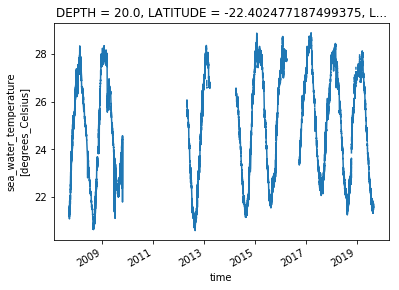

In [19]:

temp20.plot()

In [67]:
time=nc.TIME.values.tolist()
temp=nc.TEMP[:,3].values.tolist()
tt = tuple(zip(time, temp))


In [68]:
chart = Highchart()
chart.add_data_set(tt)
chart